Predictions: [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0.2, 1.0, -1.0]
Accuracy:  0.5
Training on data at index 0...
	Weight[0]: 0.20000 --> 1.20000
	Weight[1]: 1.00000 --> 1.08000
	Weight[2]: -1.00000 --> -0.28000
Training on data at index 1...
	Weight[0]: 1.20000 --> 0.20000
	Weight[1]: 1.08000 --> 0.98000
	Weight[2]: -0.28000 --> -1.28000
Training on data at index 2...
	Weight[0]: 0.20000 --> 1.20000
	Weight[1]: 0.98000 --> 1.24000
	Weight[2]: -1.28000 --> -0.70000
Training on data at index 3...
	Weight[0]: 1.20000 --> 0.20000
	Weight[1]: 1.24000 --> 0.89000
	Weight[2]: -0.70000 --> -1.65000
Training on data at index 4...
	Weight[0]: 0.20000 --> 0.20000
	Weight[1]: 0.89000 --> 0.89000
	Weight[2]: -1.65000 --> -1.65000
Training on data at index 5...
	Weight[0]: 0.20000 --> 0.20000
	Weight[1]: 0.89000 --> 0.89000
	Weight[2]: -1.65000 --> -1.65000
Training on data at index 6...
	Weight[0]: 0.20000 --> 0.20000
	Weight[1]: 0.89000 --> 0.89000
	Weight[2]: -1.65000 --> 

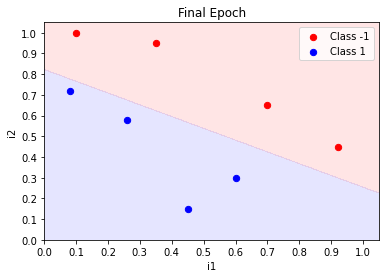

In [3]:
from __future__ import print_function
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import sys

#prediction function
def predict(inputs,weights):
	activation=0.0
	for i,w in zip(inputs,weights):
		activation += i*w 
	return 1.0 if activation>=0.0 else 0.0

def plot(matrix,weights=None,title="Prediction Matrix"):

	if len(matrix[0])==3: 
		fig,ax = plt.subplots()
		ax.set_title(title)
		ax.set_xlabel("i1")
		ax.set_ylabel("Classifications")

		if weights!=None:
			y_min=-0.1
			y_max=1.1
			x_min=0.0
			x_max=1.1
			y_res=0.001
			x_res=0.001
			ys=np.arange(y_min,y_max,y_res)
			xs=np.arange(x_min,x_max,x_res)
			zs=[]
			for cur_y in np.arange(y_min,y_max,y_res):
				for cur_x in np.arange(x_min,x_max,x_res):
					zs.append(predict([1.0,cur_x],weights))
			xs,ys=np.meshgrid(xs,ys)
			zs=np.array(zs)
			zs = zs.reshape(xs.shape)
			cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)
		
		c1_data=[[],[]]
		c0_data=[[],[]]

		for i in range(len(matrix)):
			cur_i1 = matrix[i][1]
			cur_y  = matrix[i][-1]

			if cur_y==1:
				c1_data[0].append(cur_i1)
				c1_data[1].append(1.0)
			else:
				c0_data[0].append(cur_i1)
				c0_data[1].append(0.0)

		plt.xticks(np.arange(x_min,x_max,0.1))
		plt.yticks(np.arange(y_min,y_max,0.1))
		plt.xlim(0,1.05)
		plt.ylim(-0.05,1.05)

		c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
		c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

		plt.legend(fontsize=10,loc=1)
		plt.show()
		return

	if len(matrix[0])==4:
		fig,ax = plt.subplots()
		ax.set_title(title)
		ax.set_xlabel("i1")
		ax.set_ylabel("i2")

		if weights!=None:
			map_min=0.0
			map_max=1.1
			y_res=0.001
			x_res=0.001
			ys=np.arange(map_min,map_max,y_res)
			xs=np.arange(map_min,map_max,x_res)
			zs=[]
			for cur_y in np.arange(map_min,map_max,y_res):
				for cur_x in np.arange(map_min,map_max,x_res):
					zs.append(predict([1.0,cur_x,cur_y],weights))
			xs,ys=np.meshgrid(xs,ys)
			zs=np.array(zs)
			zs = zs.reshape(xs.shape)
			cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)

		c1_data=[[],[]]
		c0_data=[[],[]]
		for i in range(len(matrix)):
			cur_i1 = matrix[i][1]
			cur_i2 = matrix[i][2]
			cur_y  = matrix[i][-1]
			if cur_y==1:
				c1_data[0].append(cur_i1)
				c1_data[1].append(cur_i2)
			else:
				c0_data[0].append(cur_i1)
				c0_data[1].append(cur_i2)

		plt.xticks(np.arange(0.0,1.1,0.1))
		plt.yticks(np.arange(0.0,1.1,0.1))
		plt.xlim(0,1.05)
		plt.ylim(0,1.05)

		c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
		c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

		plt.legend(fontsize=10,loc=1)
		plt.show()
		return
	
	print("Matrix dimensions not covered.")

# each matrix row: up to last row = inputs, last row = y (classification)
def accuracy(matrix,weights):
	num_correct = 0.0
	preds       = []
	for i in range(len(matrix)):
		pred   = predict(matrix[i][:-1],weights) # to get predicted classification
		preds.append(pred)
		if pred==matrix[i][-1]: num_correct+=1.0 
	print("Predictions:",preds)
	return num_correct/float(len(matrix))

# each matrix row: up to last row = inputs, last row = y (classification)
def train_weights(matrix,weights,nb_epoch=10,l_rate=1.00,do_plot=False,stop_early=True,verbose=True):
	for epoch in range(nb_epoch):
		cur_acc = accuracy(matrix,weights)
		print("\nEpoch %d \nWeights: "%epoch,weights)
		print("Accuracy: ",cur_acc)
		
		if cur_acc==1.0 and stop_early: break 
		#if do_plot and len(matrix[0])==4: plot(matrix,weights) # if 2D inputs, excluding bias
		if do_plot: plot(matrix,weights,title="Epoch %d"%epoch)
		
		for i in range(len(matrix)):
			prediction = predict(matrix[i][:-1],weights) # get predicted classificaion
			error      = matrix[i][-1]-prediction		 # get error from real classification
			if verbose: sys.stdout.write("Training on data at index %d...\n"%(i))
			for j in range(len(weights)): 				 # calculate new weight for each node
				if verbose: sys.stdout.write("\tWeight[%d]: %0.5f --> "%(j,weights[j]))
				weights[j] = weights[j]+(l_rate*error*matrix[i][j]) 
				if verbose: sys.stdout.write("%0.5f\n"%(weights[j]))

	#if len(matrix[0])==4: plot(matrix,weights) # if 2D inputs, excluding bias
	plot(matrix,weights,title="Final Epoch")
	return weights 

def main():

	nb_epoch		= 10
	l_rate  		= 1.0
	plot_each_epoch	= False
	stop_early 		= True

	part_A = True  

	if part_A: # 3 inputs (including single bias input), 3 weights

				# 	Bias 	i1 		i2 		y
		matrix = [	[1.00,	0.08,	0.72,	1.0],
					[1.00,	0.10,	1.00,	0.0],
					[1.00,	0.26,	0.58,	1.0],
					[1.00,	0.35,	0.95,	0.0],
					[1.00,	0.45,	0.15,	1.0],
					[1.00,	0.60,	0.30,	1.0],
					[1.00,	0.70,	0.65,	0.0],
					[1.00,	0.92,	0.45,	0.0]]
		weights= [	 0.20,	1.00,  -1.00		] # initial weights specified in problem

	else: # 2 inputs (including single bias input), 2 weights
		
		nb_epoch = 1000

				# 	Bias 	i1 		y
		matrix = [	[1.00,	0.08,	1.0],
					[1.00,	0.10,	0.0],
					[1.00,	0.26,	1.0],
					[1.00,	0.35,	0.0],
					[1.00,	0.45,	1.0],
					[1.00,	0.60,	1.0],
					[1.00,	0.70,	0.0],
					[1.00,	0.92,	0.0]]
		weights= [	 0.20,	1.00		] # initial weights specified in problem

	train_weights(matrix,weights=weights,nb_epoch=nb_epoch,l_rate=l_rate,do_plot=plot_each_epoch,stop_early=stop_early)


if __name__ == '__main__':
	main()